# Lab 6: James Lawson

<font size = '5' color='Red'>
Final score: 15/15
    

    
</font>

Part of this laboratory is based on material you have learned in class. However, a large portion of a data scientist's job is to study documentation and research additional materials. To make you prepared for such a constantly changing data landscape, several problems in this or other labs may rely on functions and methods which haven't been covered in class. A large portion of this assignment grade will be reflecting your ability to adapt new functions and methods using documentation and/or online resources. 

For example: if you needed to know how to take the square root of a number in Python, you could google: 'square root function python'. This search would direct you to the function sqrt() in the math library.

**Directions:**

Please compose your code in the appropriate Jupyter Notebook cell below the problem desription. Make sure to provide a printout in requested format.

**Lab Policies**:

   -   If your running your code leads to an **error message**, your grade for this code will be **reduced by 100%**.

   -  To get full credit for each  problem, your code should produce a neat and informative output. Depending on the problem, you will be asked to produce either informative printout or type a written conclusion. If you were asked to calculate the number of instances of the letter 'e' in the string: 'Old MacDonald had a farm.', your printout would look say something like: 'Number of 'e' characters in the string = 0'. See specific details in the individual problem descriptions.

   - Data for each problem are given to you in the format most convenient to the data collector. It is not necessarily (and in fact almost never) the most convenient format for data analysis. You can choose to either to work with the given format or convert it to any of the other variable types studied in class. However, you are not allowed to just re-type the data. All type conversions should be done algorithmically.

   - You are welcome to consult with your classmates and ANY online resources while working on this lab. Feel free to adapt (copy and paste and then change) any code from pre-class tutorials and workshops. It is never useful to needlessly duplicate effort.

# Darwin's Finches

In this lab, you will immerse yourself in one of the most interesting biological data sets. You might know that many of the important observations that led Charles Darwin to develop the theory of evolution were made in the Galapagos archipelago, particularly in the study of the small finches that inhabit them. The islands are ideal for studying evolution because they are isolated and so they do not have complicated effects with interactions with other species, including humans. Furthermore, some of them are small, so entire populations can be monitored.

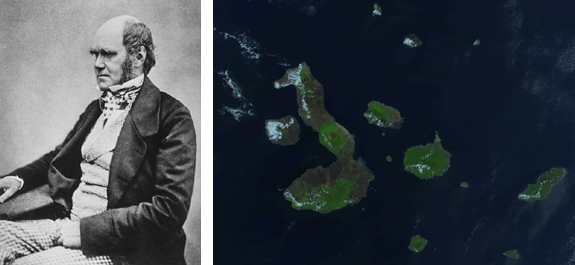

Every year since 1973, Peter and Rosemary Grant of Princeton University have spent several months on the tiny volcanic island named Daphne Major in the Galapagos. This island has two dominant ground finch species, *Geospiza fortis* and *Geospiza scandens*. 

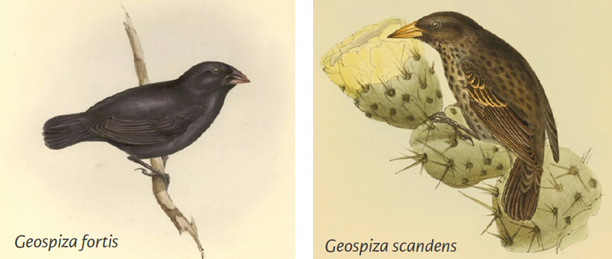

The Grants have monitored them every year, tagging them, making physiological measurements, taking samples for genetic sequencing and more. In 2014, they published a book entitled "40 years of Evolution: Darwin's Finches on Daphne Major Island". They generously placed all of their data in the [Dryad data repository](https://datadryad.org/resource/doi:10.5061/dryad.g6g3h), making it free for anyone to use. The data set is impressive and a great set for applying data science and statistical inference to learn about evolution.

You will work with the Grants' measurements of the beak length and beak depth. You will consider different aspects of the beak geometry, including how it varies over time from species to species.

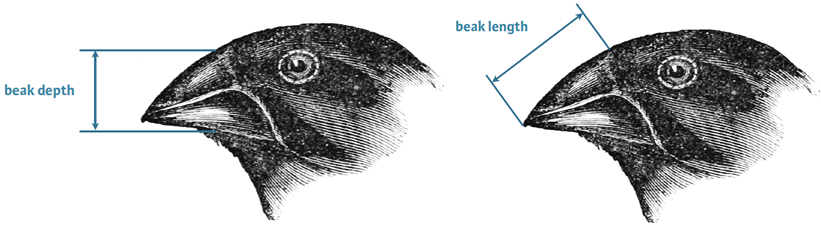

##  Probelem 1: Change in beak depth over time

For your first analysis, you will investigate how the beak depth of Geospiza scandens has changed over time. You will start with some exploratory analyses of the measurements of these species from 1975 to 2012.

You are provided with the following file: 
- **finch_beaks.csv** contains data for both species for the individual years of 1975 and 2012.  Note: column "species" of the file contains categorical variables for the species of the finches (scandens, or fortis). 

### (A) Making Box plot and Swarm plot of beak change in Geospiza scandens over years 

Make three **horizontal** subplots:
  -  **Left** subplot: a swarm plot of the distributions of beak depth in *Geospiza scandens*  in the years 1975 and 2012
  -  **Middle** subplot: a box and wisker plot of beak depth in *Geospiza scandens*  in the years 1975 and 2012
  -  **Right** subplot: Overlay of boxplots and swarm plots of beak depth in *Geospiza scandens*  in the years 1975 and 2012. **Note:** We only want to overlay the outline of the box plot here, so make the color of the boxplot white rather than the default.
  
Make appropriate title(s), label(s) and legend(s). See the graph below for inspiration. Your colors do not need to match the example.

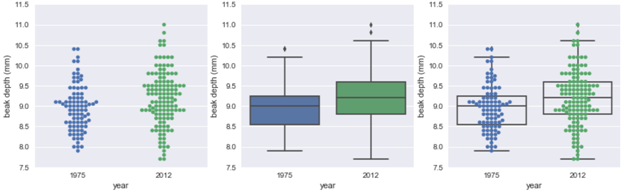

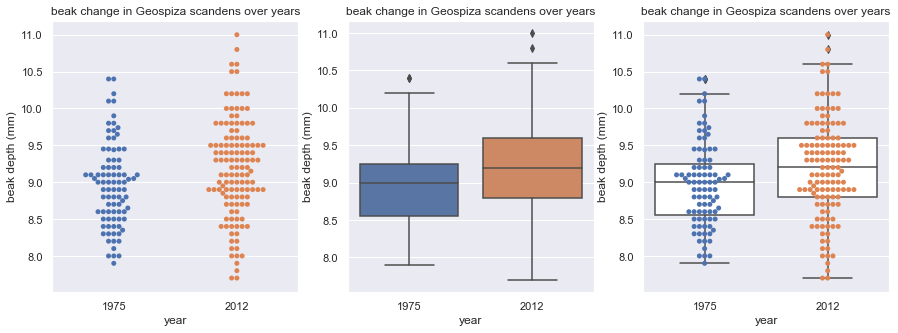

In [7]:
# Import all necessary libraries
import pandas  as pd
import numpy   as np
import seaborn as sns
import matplotlib.pyplot as plt

# Use seaborn plotting settings
sns.set()

# Import datasets
df = pd.read_csv('finch_beaks.csv')

#figure size is set
plt.figure(figsize = (15, 5))

#data frame with only the species scandens is created
dfSpecific = df[df.species == "scandens"]

#plot 1: swarm plot of the distributions of beak depth. Title and y label are added
plt.subplot(1, 3, 1)
sns.swarmplot(x=dfSpecific.year, y=dfSpecific.bdepth, data = dfSpecific)
plt.title("beak change in Geospiza scandens over years")
plt.ylabel("beak depth (mm)")

#plot 2: box plot with Seaborn's default settings. Title and y label are added
plt.subplot(1, 3, 2)
sns.boxplot(x=dfSpecific.year, y=dfSpecific.bdepth, data = dfSpecific)
plt.title("beak change in Geospiza scandens over years")
plt.ylabel("beak depth (mm)")

#plot 3: overlay of boxplots and swarm plots. Title and y label are added
plt.subplot(1, 3, 3)
sns.swarmplot(x=dfSpecific.year, y=dfSpecific.bdepth, data = dfSpecific)
sns.boxplot(x=dfSpecific.year, y=dfSpecific.bdepth, data = dfSpecific, boxprops=dict(facecolor="white"))
plt.title("beak change in Geospiza scandens over years")
plt.ylabel("beak depth (mm)")

# Show the plot
plt.show()

#### Conclusion

In the space below describe the trend of beak depth over time. Which type of graph helped you to obeserve these trends more easily?

In [2]:
#Over time, beak depth has gotten larger on average from 1975 to 2012. The boxplot helped me observe the trend most easily.

## Problem 2: ECDFs of beak depth and beak length

### (A) ECDFs of beak depths

While bee swarm plots are useful, ECDFs are often even better when doing exploratory data analysis (EDA). Plot the ECDFs for the 1975 and 2012 beak depth measurements on the same plot. To separate datasets from different years, use blue for the year 1975 and red for 2012.

Make appropriate title(s), label(s) and legend(s). Are there any visual differences in the distributions of beak depths? Summarize your plot analysis in 1-3 sentences below the graph.

The code for our ecdf function from class is provided below.

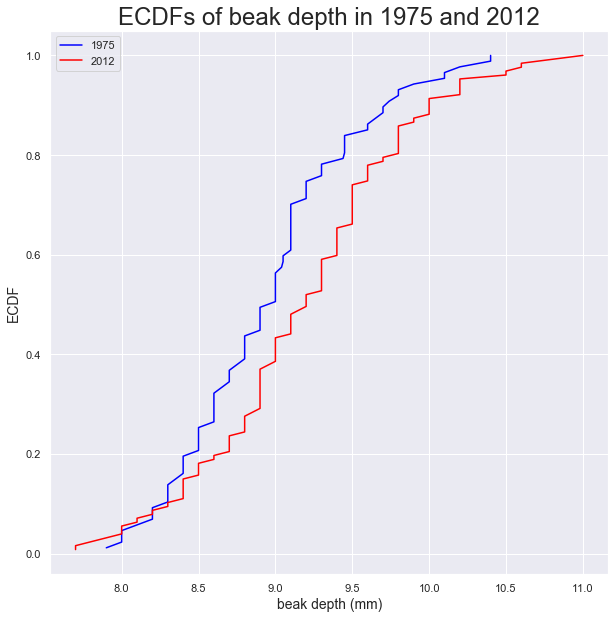

In [3]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)
    # x-data for the ECDF: x
    x = np.sort(data)
    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n
    return x, y

#figure size is set
plt.figure(figsize = (10, 10))

#data frame with 1975 data and 2012 data are created
dfSpecific1975 = dfSpecific[dfSpecific.year == 1975]
dfSpecific2012 = dfSpecific[dfSpecific.year == 2012]

#ecdf function is called on the beak depth of the 1975 and 2012 data
X1975, Y1975 = ecdf(dfSpecific1975.bdepth)
X2012, Y2012 = ecdf(dfSpecific2012.bdepth)

#data is plotted with 1975 in blue and 2012 in red
plt.plot(X1975, Y1975, label="1975", color = "blue")
plt.plot(X2012, Y2012, label="2012", color = "red")

#legend is created
plt.legend(loc="best")

#title is added
plt.title("ECDFs of beak depth in 1975 and 2012", fontsize = 24)

#x and y label are created
plt.xlabel("beak depth (mm)", fontsize = 14)
plt.ylabel("ECDF", fontsize = 14)

#plot is shown
plt.show()

The ECDF of beak depth trend is larger in 2012 when compared to 1975.

## (B) ECDFs of beak length

Now let's see if beak length changes over time.  Plot the ECDFs for the 1975 and 2012 beak length measurements on the same plot. To separate datasets from different years, use blue for year 1975 and red for 2012.

Make appropriate title(s), label(s) and legend(s). 

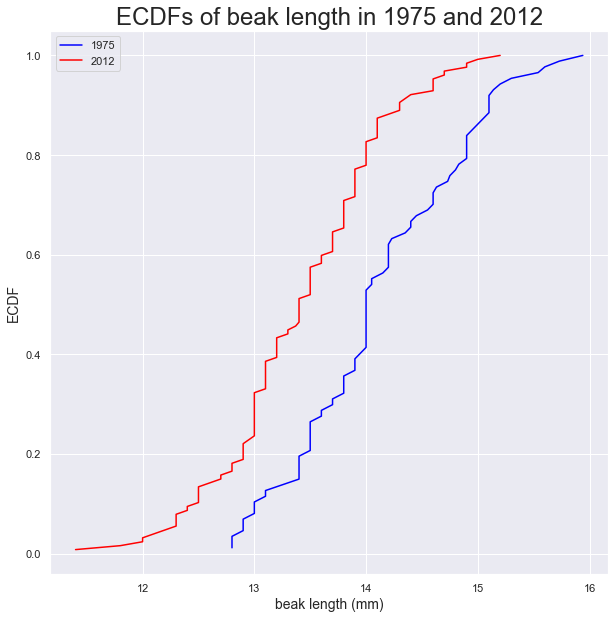

In [4]:
#figure size is set
plt.figure(figsize = (10, 10))

#ecdf function is called on the beak length of the 1975 and 2012 data
X1975, Y1975 = ecdf(dfSpecific1975.blength)
X2012, Y2012 = ecdf(dfSpecific2012.blength)

#data is plotted with 1975 in blue and 2012 in red
plt.plot(X1975, Y1975, label="1975", color = "blue")
plt.plot(X2012, Y2012, label="2012", color = "red")

#legend is created
plt.legend(loc="best")

#title is added
plt.title("ECDFs of beak length in 1975 and 2012", fontsize = 24)

#x and y label are created
plt.xlabel("beak length (mm)", fontsize = 14)
plt.ylabel("ECDF", fontsize = 14)

#plot is shown
plt.show()

#### Conclusion

*Describe the distributions of beak depth  and beak length over time.  What is the difference in the shape of ECDFs over the years?  Do the shapes of the ECDFs for depth and length follow the same trend? Interpret the difference in shape in the context of the evolution. If the observed trend continues, what you changes in beak depth would you expect in the future?*

The distribution of beak depth and beak length are not very similar. ECDF for beak depth was larger in 2012 when compared to 1975. ECDF for beak length was larger in 1975 when compared to 2012. The shapes of the ECDFs for depth and length follow the same general trend. The beak depths are getting bigger as time passes and beak length is getting smaller as time passses, this could be due to the which beak type is best for changing food preferences and avalibility. If the observed trend continues, I would expect to see larger and larger beak depths in the future.

## Problem 3: EDA of beak length and depth

Beak shape can change over time in response to the different types of food the birds forage. Interestingly, a drought in the winter of 1976/77 resulted in the death of plants which produce small seeds. Shifts in the shape of foraged seeds might lead to a change in beak configuration. 

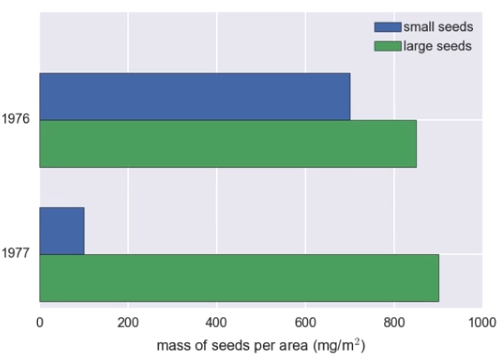

It is reasonable, therefore, to hypothesize that larger seeds required deeper beaks to crack them, so larger-beaked birds survived and reproduced. If this is the case, it stands to reason that the length of the beak might also change over time. Importantly, if the length and depth change at the same rate, the beak has the same shape; it just gets bigger. Let's conduct exploratory data analysis of how beak length and depth changed together.

Make scatter plots of beak length (x-axis) versus beak depth (y-axis) for the 1975 and 2012 specimens on the same plot. To separate datasets from different years, use blue for year 1975 and red for 2012. Make appropriate label(s) and legend(s). Is there any visual relationship between beak length and beak depth? Summarize your plot analysis in 1-3 sentences below the graph.

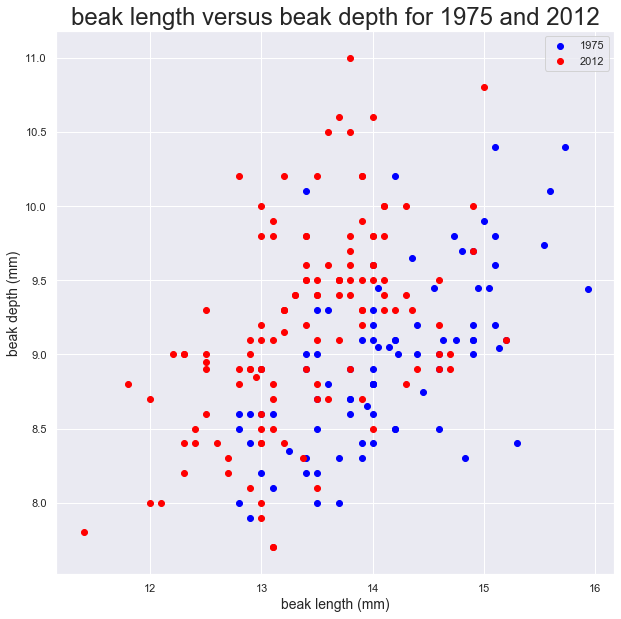

In [5]:
#figure size is set
plt.figure(figsize = (10, 10))

#scatter plot with beak length and beak depth from 1975 and 2012
plt.scatter(dfSpecific1975.blength, dfSpecific1975.bdepth, color = "blue", label = "1975")
plt.scatter(dfSpecific2012.blength, dfSpecific2012.bdepth, color = "red", label = "2012")

#legend
plt.legend(loc="best")

#title is created
plt.title("beak length versus beak depth for 1975 and 2012", fontsize = 24)

#x and y labels are created
plt.xlabel("beak length (mm)", fontsize = 14)
plt.ylabel("beak depth (mm)", fontsize = 14)

#title is shown
plt.show()

#### Conclusion

*Can you observe any trend in relationship between beak length and beak depth? Does this relationship change over time? Do you think your graph can support the drought hypothesis described above? Why/why not?*

In [6]:
#As the beak length increases, the beak depth increases. This relationship stays constant between 1975 and 2012. I think the graph does support
#the hypothesis described above because beak depth is generally larger in 2012 when compared to 1975 which would make sense if there were more
#larger seeds which required a deeper beak to crack and consume those seeds.